# Домашка 2

In [1]:
import functools as ft
import math
import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integrate
import scipy.stats as stats

## № 1

Sample: [1.1, 2.1, 1.3, 0.9, 2.7, 1.4, 1.6, 1.3, 1.4, 2.4]
Ordered: [0.9, 1.1, 1.3, 1.3, 1.4, 1.4, 1.6, 2.1, 2.4, 2.7]
Mean: 1.62
Variance: 0.3096


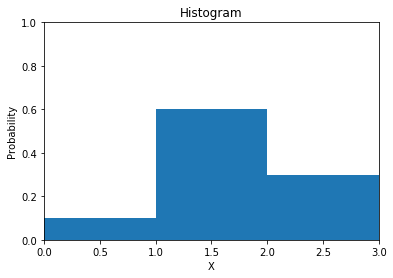

In [2]:
X = [1.1, 2.1, 1.3, 0.9, 2.7, 1.4, 1.6, 1.3, 1.4, 2.4]

print('Sample:', X)
print('Ordered:', sorted(X))

X = np.array(X)

print('Mean:', X.mean())
print('Variance:', X.var())

bins = [0, 1, 2, 3]
plt.hist(X, bins, normed=True)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Histogram')
plt.axis([0, 3, 0, 1])
plt.show()


## № 2


In [3]:
def expected_number_of_intervals(m, n):
    h = (m - 1) / m
    return m * (h ** n)

N = 1000
m = 1
while expected_number_of_intervals(m, N) <= 0.02:
    m += 1

print('m-1:', m-1, '=>', expected_number_of_intervals(m-1, N))
print('  m:', m, '=>', expected_number_of_intervals(m, N))

m-1: 115 => 0.018522893223552685
  m: 116 => 0.02015158059940172


## № 12

In [4]:
X = [1, 2, 1, 5, 7, 8, 16, -3, -2]
X = np.array(X)

def F(X, a):
    return sum(abs(X - a))

f = ft.partial(F, X)

result = opt.minimize_scalar(f)

print('Likelihood of sample is maximized at:', result.x)

Likelihood of sample is maximized at: 1.99999999038


## № 14
Exponential distribution generation

### (a)

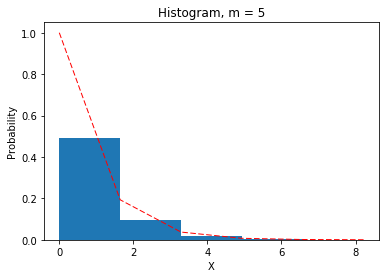

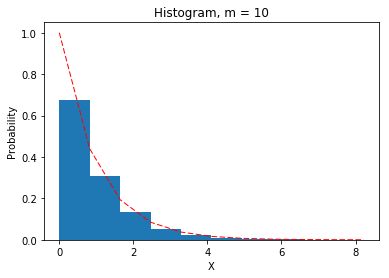

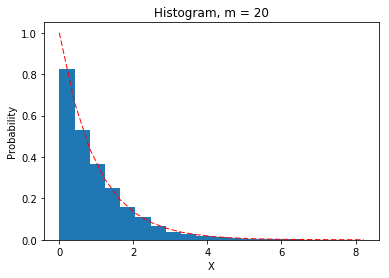

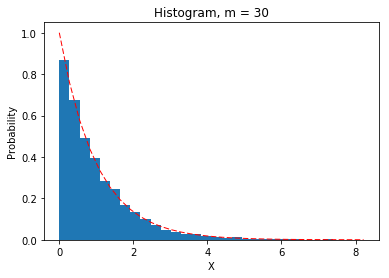

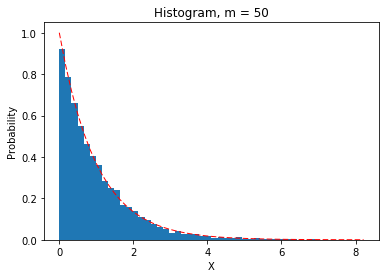

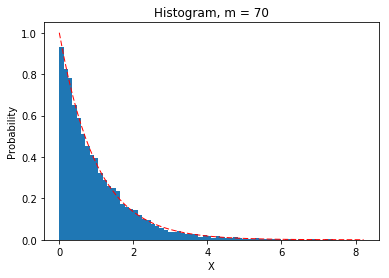

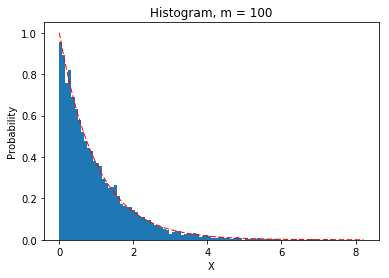

In [5]:
expon = stats.expon

n = 10000
X = expon.rvs(size=n)

def plot_histogram(X, m):
    n, bins, patches = plt.hist(X, m, normed=True)
    y = expon.pdf(bins)
    plt.plot(bins, y, 'r--', linewidth=1)
    plt.xlabel('X')
    plt.ylabel('Probability')
    plt.title('Histogram, m = {}'.format(m))
    plt.show()

for m in (5, 10, 20, 30, 50, 70, 100):
    plot_histogram(X, m)


### (b)

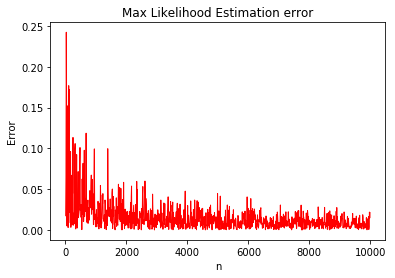

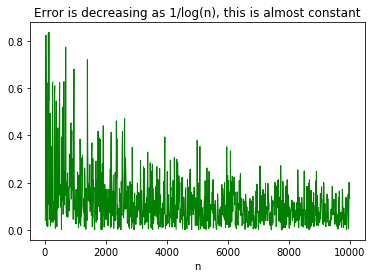

In [6]:
def mle(X):
    return 1 / X.mean()

XN = np.array(range(10, 10000, 10))
Y = np.array([abs(mle(expon.rvs(size=n)) - 1) for n in XN])

plt.plot(XN, Y, 'r-', linewidth=1)
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Max Likelihood Estimation error')
plt.show()

plt.plot(XN, np.log(XN)*Y, 'g-', linewidth=1)
plt.xlabel('n')
plt.title('Error is decreasing as 1/log(n), this is almost constant')
plt.show()


## № 15

### (a)

In [7]:
uniform = stats.uniform

def D_n(n, out=False):
    X = uniform.rvs(size=n)
    H = np.histogram(X, bins='auto', density=True)
    D = stats.rv_histogram(H)
    f = lambda x: -1 * abs(D.cdf(x) - uniform.cdf(x))
    x_ = opt.minimize_scalar(f, method='bounded', bounds=(0, 1)).x
    return -1 * f(x_)

D5_sample = [D_n(5) for __ in range(100)]
D5_sample = np.array(D5_sample)

print('Mean:', D5_sample.mean())
print('Variance:', D5_sample.var())

Mean: 0.301606046501
Variance: 0.0216349125273


### (b)

In [8]:
sample_size = 100

def prob_est(m, eps):
    Dm_sample = [D_n(m) for __ in range(sample_size)]
    p = sum(1 for d in Dm_sample if d > eps) / float(sample_size)
    return p

def estimate_m():
    eps = 0.1
    m = 80
    while prob_est(m, eps) > 0.05:
        m += 10
    return m

M_sample = [estimate_m() for __ in range(5)]
M_sample = np.array(M_sample)

print('Mean(m):', M_sample.mean())

Mean(m): 134.0


## № 16

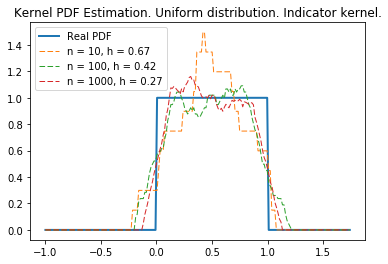

n =   10   ::   max error = 0.346650082765
n =  100   ::   max error = 0.498002528054
n = 1000   ::   max error = 0.500122149524
n =   10   ::   sum error = 0.26244728043383886
n =  100   ::   sum error = 0.1420719804189021
n = 1000   ::   sum error = 0.11024326454440134


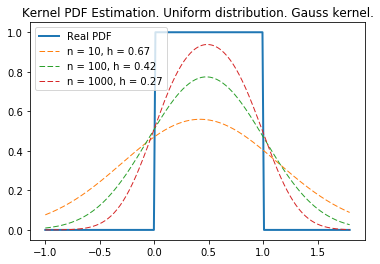

n =   10   ::   max error = 0.529467584402
n =  100   ::   max error = 0.50993271623
n = 1000   ::   max error = 0.512720710331
n =   10   ::   sum error = 0.5249488213275012
n =  100   ::   sum error = 0.37233496024686286
n = 1000   ::   sum error = 0.2508018870165335


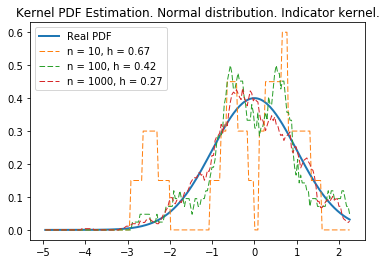

n =   10   ::   max error = 0.227187854432
n =  100   ::   max error = 0.153832303498
n = 1000   ::   max error = 0.0783934353079
n =   10   ::   sum error = 0.630721853735072
n =  100   ::   sum error = 0.27044609228060773
n = 1000   ::   sum error = 0.11333041267598357


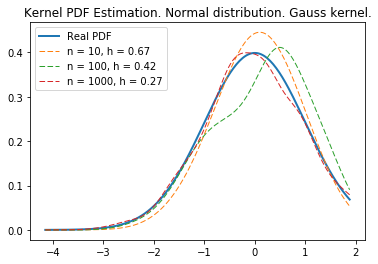

n =   10   ::   max error = 0.0318911841744
n =  100   ::   max error = 0.102800773555
n = 1000   ::   max error = 0.028412250859
n =   10   ::   sum error = 0.11254728501050043
n =  100   ::   sum error = 0.1935060487690276
n = 1000   ::   sum error = 0.040019548210985655


In [10]:
def kernel_estimator(kernel, bandwidth, data):
    
    K = kernel
    h = bandwidth
    X = data
    n = len(X)
    
    def f(x):
        return sum(K((x - x_sample)/h) for x_sample in X) / (n * h)
    
    return f


def do_modelling_for(real_pdf, data, kernel, xs, bounds):
    n = len(data)
    d = 1
    h = (n * (d + 2) / 4.)**(-1. / (d + 4))
    kernel_est = kernel_estimator(kernel, h, data)
    Y_est = np.array([kernel_est(x) for x in xs])

    f_est_diff = lambda x: abs(real_pdf(x) - kernel_est(x))
    
    a = -1 * opt.minimize_scalar(
        lambda x: -1 * f_est_diff(x),
        method='bounded', bounds=bounds
    ).fun
    
    # r = integrate.quad(f_est_diff, -np.inf, +np.inf, full_output=1)
    r = integrate.quad(f_est_diff, bounds[0], bounds[1], full_output=1)
    b = r[0]

    return n, h, kernel_est, Y_est, a, b
    

def do_modelling(tag, kernel, distribution, sizes):
    X = [distribution.rvs(size=n) for n in sizes]
    M = len(sizes)
    
    xmin = min([X[k].min() for k in range(M)])
    xmax = min([X[k].max() for k in range(M)])
    Xs = np.linspace(xmin-1, xmax+1, 200)
    d = xmax - xmin
    bounds = (xmin - 0.2*d, xmax + 0.2*d)

    results = [do_modelling_for(distribution.pdf, data, kernel, Xs, bounds) for data in X]

    Y_real = distribution.pdf(Xs)
    plt.plot(Xs, Y_real, '-', linewidth=2, label='Real PDF')

    for n, h, K_est, Y_est, a, b in results:
        plt.plot(Xs, Y_est, '--', linewidth=1, label='n = {}, h = {:.2}'.format(n, h))
    
    plt.title('Kernel PDF Estimation. {}'.format(tag))
    plt.legend(loc=2)
    plt.show()
    
    for n, h, K_est, Y_est, a, b in results:
        print('n = {:4}'.format(n), '  ::   max error =', a)
    for n, h, K_est, Y_est, a, b in results:
        print('n = {:4}'.format(n), '  ::   sum error =', b)
    

K_indicator = lambda x: 1 if abs(x) <= 0.5 else 0
K_normal = stats.norm.pdf

sizes = (10, 100, 1000)
do_modelling('Uniform distribution. Indicator kernel.', K_indicator, stats.uniform, sizes)
do_modelling('Uniform distribution. Gauss kernel.', K_normal, stats.uniform, sizes)
do_modelling('Normal distribution. Indicator kernel.', K_indicator, stats.norm, sizes)
do_modelling('Normal distribution. Gauss kernel.', K_normal, stats.norm, sizes)


Для оцінки густини рівномірного розподілу гаусовським ядром зробити $max|P(x) - K_n(x)| < 0.2$ не вийде, тому що будуть точки близьки до границь інтервалу (0, 1), в ядерній оцінці тобто будуть гаусівськи доданки з максимумом в районі $x=1$ що дорівнює 0.5.